# Open Street Map

[Open Street Map](https://www.openstreetmap.org/) (OSM) on avoin karttapalvelu, jossa käyttäjät voivat itse osallistua karttojen luomiseen. Koska kyseessä on avoin projekti, sen aineistoa voidaan hyödyntää vapaasti omiin tarkoituksiin (myös kaupallisiin). Pääsemme pythonilla käsiksi OSM:n aineistoon [osmnx](https://osmnx.readthedocs.io/en/stable/index.html)-kirjaston avulla. Aineistosta voidaan hakea paljon kaikenlaista paikkatietoa, kuten tieverkostoja, rakennuksia, puistoja, ravintoloita jne.

Tässä harjoituksessa tutustutaan osmnx-kirjastoon, haetaan sen avulla paikkatietoja Tampereen keskustorin lähettyviltä ja piirretään niitä kartalle. Lisäksi tässä harjoituksessa tarvitaan [matplotlib](https://matplotlib.org/)-kirjastoa, joka sisältää funktioita kuvaajien piirtämistä varten.

Aloitetaan hakemalla tarvittavat kirjastot.

In [1]:
import osmnx as ox  # Paikkatietojen hakemiseen ja käsittelyyn tarvittavia funktioita
import matplotlib.pyplot as plt  # Kuvaajien piirtämiseen tarvittavia funktioita

Määritellään seuraavaksi osoite, jonka ympäristöstä haluamme etsiä paikkatietoja, sekä etäisyys. Etsitään paikkatietoja 1km säteellä Tampereen keskustorista.

In [2]:
# Määritellään osoite ja etäisyys ja tallennetaan ne muuttujiin "address" ja "distance"

address = "Keskustori 1, 33100, Tampere, Finland"
distance = 1000 # metriä

Seuraavaksi voidaan hakea kuvaajaan tarvittavat tiedot [`ox.graph_from_address()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_address)-funktion avulla. Haetaan tiedot ja piirretään niistä kuvaaja [`ox.plot_graph()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph)-funktiolla.

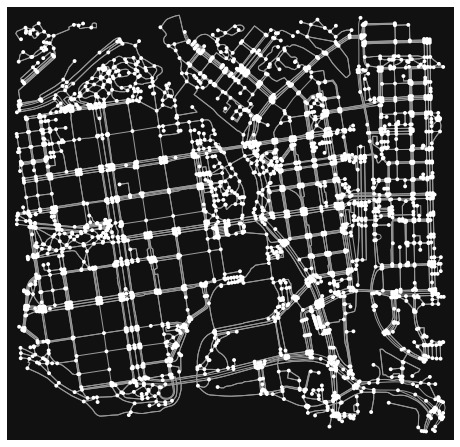

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd44d510190>)

In [3]:
# Haetaan OpenStreetMapin katuverkosto "graph_from_address"-funktion avulla
graph = ox.graph_from_address(address, dist=distance)

# Piirretään verkosto näytölle
ox.plot_graph(graph)

Hienolta näyttää! Saimme parilla koodirivillä piirrettyä Tampereen keskustorin ympäristössä olevat tiet ja niiden risteyskohdat. Tavoitteenamme on seuraavaksi piirtää samaan kuvaan kaikki tiet sekä alueella olevat rakennukset.

Aluksi eritellään kuvaajasta omaksi muuttujikseen teiden solmukohdat sekä tiet [`ox.graph_to_gdfs()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils_graph.graph_to_gdfs)-funktion avulla. Saamme haluamamme tiedot GeoDataFrame-muodossa, jotka ovat käytännössä taulukoita, jotka sisältävät muiden tietojen lisäksi paikkatietoja.

Etsitään lisäksi lähistöllä olevat rakennukset [`ox.geometries_from_address`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geometries.geometries_from_address)-funktiolla. Saamme tiedot kaikista rakennuksista lisäämällä funktion parametreihin `tags = {'building': True}`. Tämäkin funktio antaa rakennukset GeoDataFramena.

In [4]:
# eritellään kuvasta solmupisteet (nodes) ja reunat, eli tässä siis kadut (edges) omiksi muuttujikseen
nodes, edges = ox.graph_to_gdfs(graph)

# etsitään osoitteen avulla alueella olevat rakennukset käyttäen tagia "building": True
buildings = ox.geometries_from_address(address, dist=distance, tags = {'building': True} )

# GeoDataFramen sisältämiä sarakkeita voidaan tarkastella seuraavasti
print(buildings.columns)

Index(['unique_id', 'osmid', 'element_type', 'amenity', 'geometry',
       'addr:street', 'name', 'parking', 'wheelchair', 'entrance',
       ...
       'building:min_level', 'brand', 'brand:wikipedia',
       'seamark:landmark:category', 'seamark:type', 'construction',
       'official_name', 'ways', 'type', 'historic:name'],
      dtype='object', length=124)


Huomataan, että rakennuksista on paljon erilaista tietoa (kolme pistettä keskellä viittaa siihen, että kaikki tiedot eivät mahdu näytölle), kuten niille määritelty nimi tai pääsy pyörätuolilla. Tässä harjoituksessa piirretään kartalle kuitenkin kaikki rakennukset, joten dataa ei tarvitse enempää manipuloida.

Nyt voimme piirtää rakennukset ja kadut samaan kuvaan. Tätä varten tehdään kuvalle pohja `subplots()`-funktiolla. Tämä funktio antaa paluuarvoina itse kuvan sekä kuvan akselit, joita tarvitsemme, jotta saamme samalle akselille piirrettyä sekä rakennukset että tieverkoston.

Lisäksi käytetään seuraavia funktioita:
- [`ax.set_facecolor()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html?highlight=set_facecolor#matplotlib.axes.Axes.set_facecolor) -> asetetaan kuvaajaan taustaväri
- [`plt.title()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html?highlight=title#matplotlib.pyplot.title) -> asetetaan kuvaajalle otsikko
- [`plt.show()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html?highlight=show#matplotlib.pyplot.show) -> näytetään ainoastaan kuva, eikä muuta koodisolun tietoa.

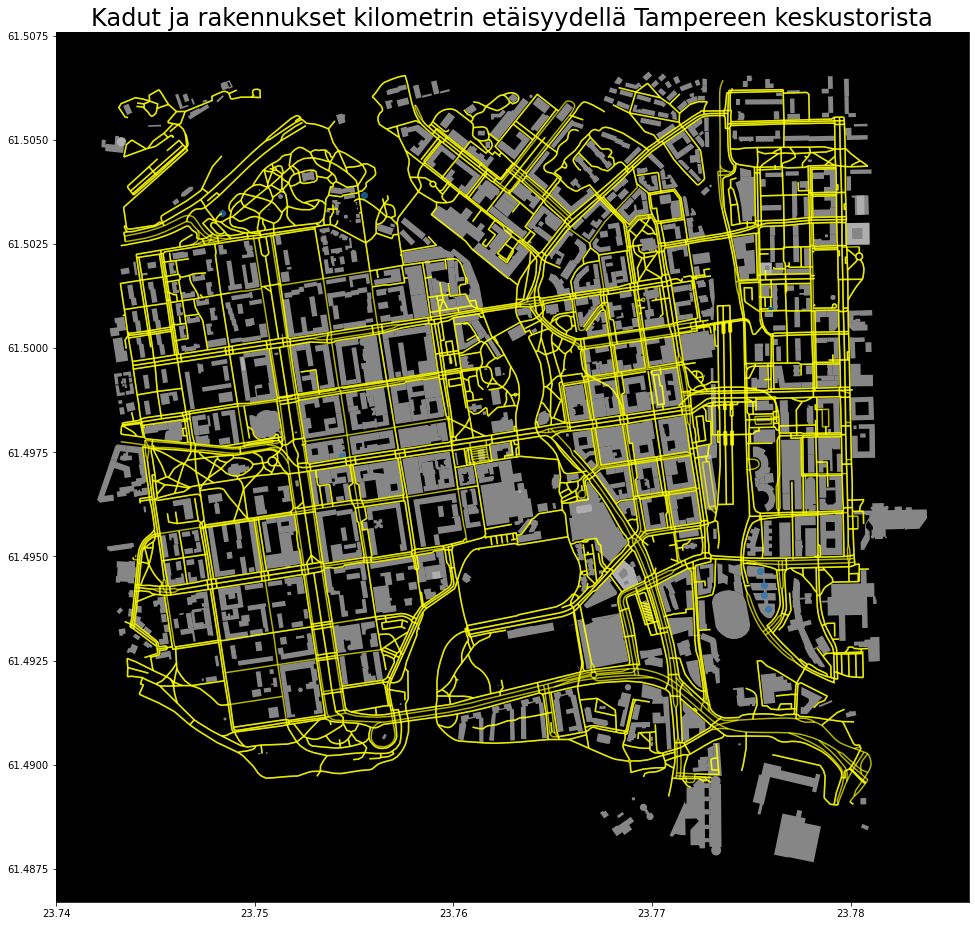

In [5]:
# Jotta tiet ja rakennukset saadaan samaan kuvaan, tehdään kuvalle pohja:
fig, ax = plt.subplots(figsize=(24,16)) # Määritellään kuvan koko tuumina

# Asetetaan taustaväriksi musta, jotta tiet ja rakennukset erottuvat paremmin
ax.set_facecolor('black')

# Asetetaan kuvalle otsikko
plt.title('Kadut ja rakennukset kilometrin etäisyydellä Tampereen keskustorista', fontsize=24)

# Piirretään tieverkosto, alpha-parametrilla säädetään värin läpinäkyvyyttä
# Huom. akseliksi pitää määritellä ax
edges.plot(ax=ax, color='yellow', alpha=0.7)

# Piirretään rakennukset
# Huom. akseliksi pitää määritellä ax
buildings.plot(ax=ax, facecolor='silver', alpha=0.7) 

plt.show() # Näytetään kuva show()-funktiolla

Nyt olemme saaneet piirrettyä jo sekä tieverkoston, että rakennukset. Lisätään vielä puistot kuvaan. Ne löytyvät vapaa-aikaan viittaavalla tagilla "leisure". Tällä tagilla löytyy kuitenkin muitakin paikkoja kuin puistoja, joten dataa pitää hieman karsia.

In [6]:
# etsitään osoitteen avulla alueella olevat vapaa-aikaan liittyvät paikkatiedot käyttäen tagia "leisure": True
leisure = ox.geometries_from_address(address, dist=distance, tags={"leisure":True})

# katsotaan, mitä sarakkeita "leisure" pitää sisällään:
leisure.columns

Index(['unique_id', 'osmid', 'element_type', 'addr:city', 'addr:country',
       'addr:housenumber', 'addr:street', 'amenity', 'contact:website',
       'leisure', 'name', 'was:name', 'geometry', 'barrier', 'foot',
       'addr:postcode', 'opening_hours', 'sport', 'wheelchair', 'name:en',
       'name:fi', 'name:alt', 'phone', 'website', 'building', 'layer',
       'payment:bitcoin', 'email', 'level', 'addr:unit', 'alt_name', 'fee',
       'brand', 'nodes', 'loc_name', 'old_name', 'wikidata', 'name:sv',
       'wikipedia', 'name:it', 'source', 'note', 'surface', 'url', 'area',
       'lit', 'fence_type', 'access', 'fixme', 'official_name', 'ways', 'type',
       'lanes', 'bicycle', 'boundary'],
      dtype='object')

Vapaa-aikaan liittyvissä paikkatiedoissa on sarake nimeltä "leisure". Katsotaan vielä mitä eri kohteita se pitää sisällään.

In [7]:
print(leisure['leisure'].unique())

['miniature_golf;escape_game;curling' 'playground' 'sports_centre'
 'marina' 'arena' 'slipway' 'fitness_station' 'sauna' 'pitch' 'dance'
 'fitness_centre' 'amusement_arcade' 'park' 'stadium' 'miniature_golf'
 'dog_park' '*' 'garden' 'track' 'nature_reserve']


Voisimme etsiä paikkoja, kuten leikkikenttiä, saunoja tai huvipuistoja. Halusimme kuitenkin piirtää puistot kartalle. Niitä vastaavilla paikoilla sarakkeessa on sana 'park'. Eritellään puistot muusta datasta ja tallennetaan ne muuttujaan "parks".

In [8]:
# Valitaan kaikista vapaa-aikaan liittyvistä paikkatiedoista (leisure) sarake nimeltään leisure ja valitaan ne rivit, joissa tuo sarake on 'park'
parks = leisure[leisure["leisure"].isin(["park"])]

Nyt voimme piirtää paikkatiedot näytölle samaan tapaan kuin aiemmin.

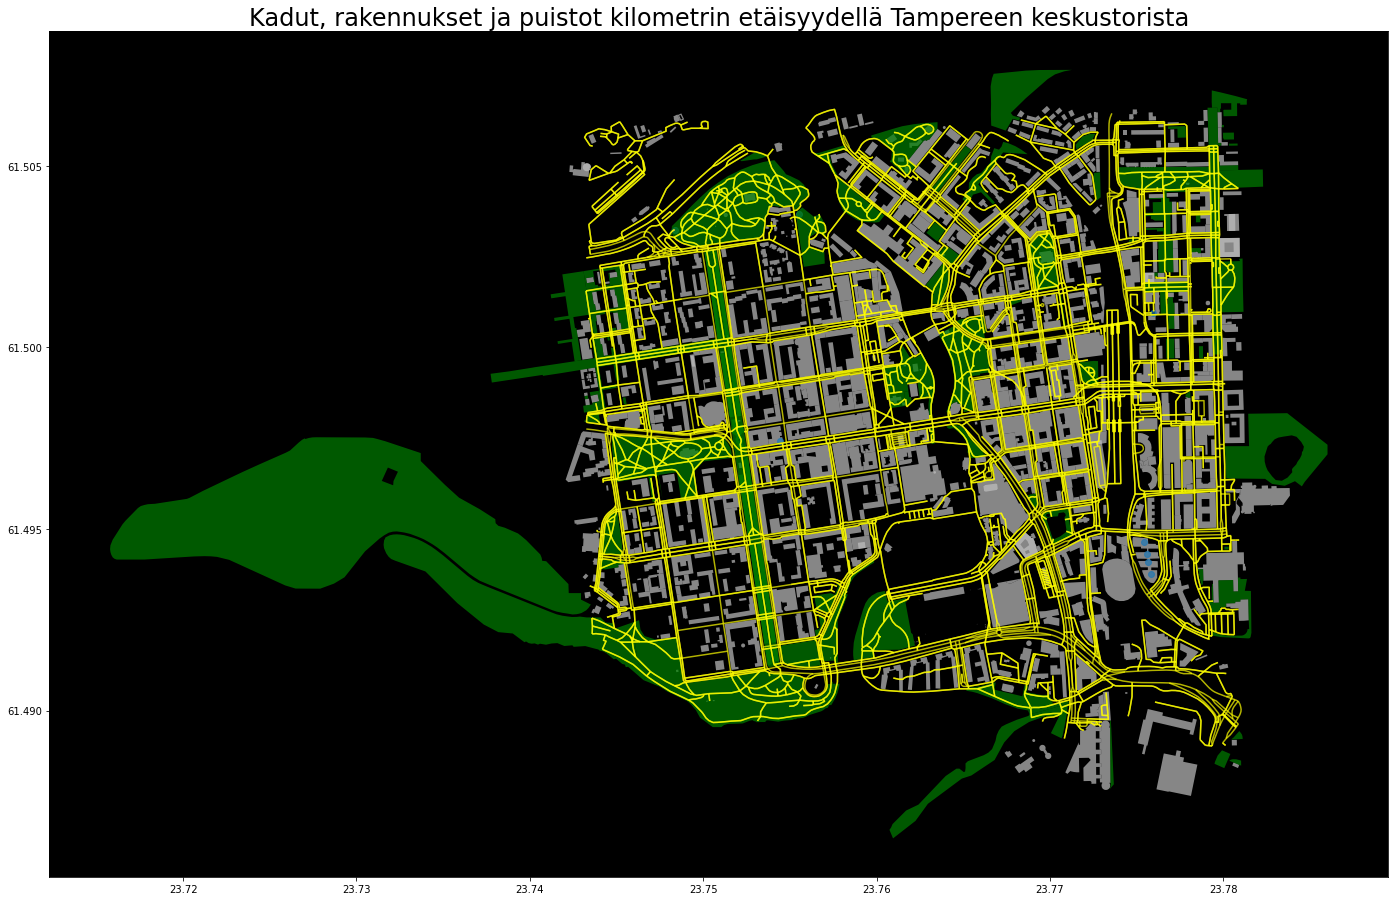

In [9]:
fig, ax = plt.subplots(figsize=(24,16))

ax.set_facecolor('black')
plt.title('Kadut, rakennukset ja puistot kilometrin etäisyydellä Tampereen keskustorista', fontsize=24)

edges.plot(ax=ax, color='yellow', alpha=0.7)
buildings.plot(ax=ax, facecolor='silver', alpha=0.7) 

# Piirretään puistot
parks.plot(ax=ax, facecolor='green', alpha=0.7)

plt.show()

Huomataan, että piirretyt puistot ulottuvat kilometriä kauemmas keskustorilta. Määritellään vielä kuvaajalle rajat, jotta saamme rajattua saman alueen kuin aikaisemminkin. Tämä onnistuu [`plt.xlim()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html?highlight=xlim#matplotlib.pyplot.xlim)- ja [`plt.ylim()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html?highlight=ylim#matplotlib.pyplot.ylim)-funktioilla. Katsotaan rajoille sopivat lukuarvot kuvan akseleilta.

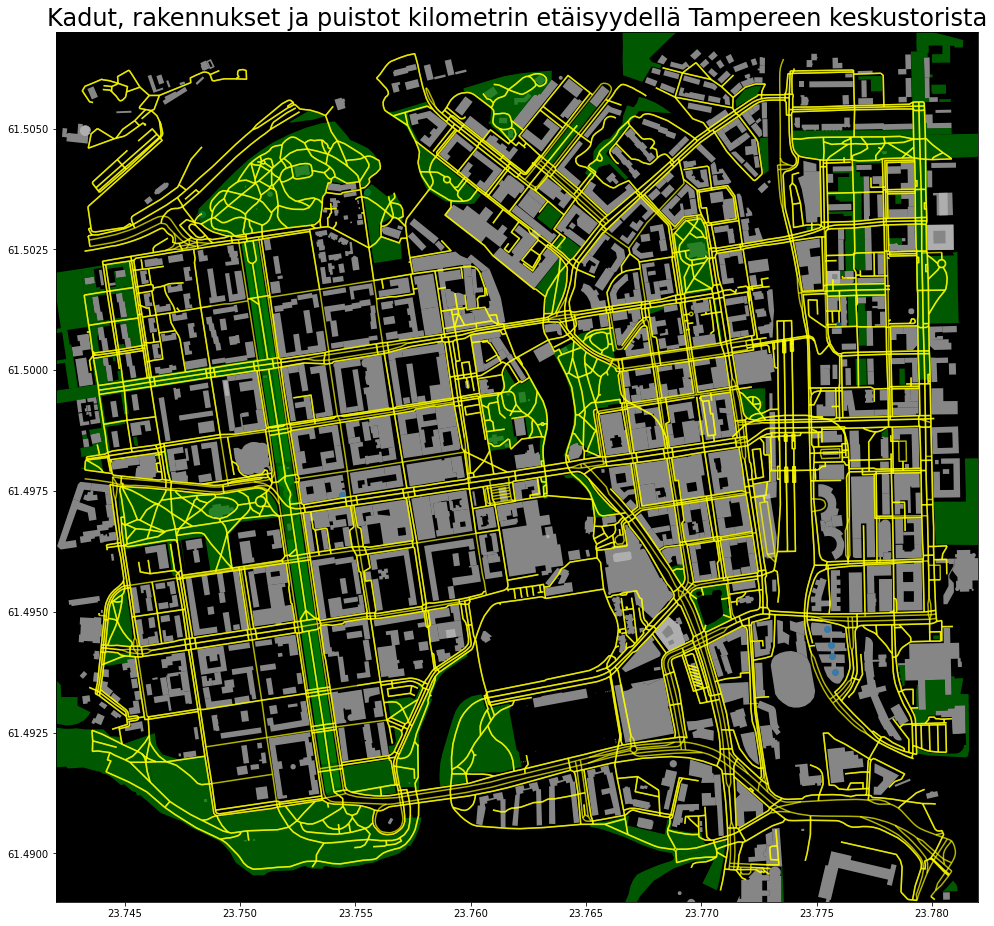

In [10]:
fig, ax = plt.subplots(figsize=(24,16))

ax.set_facecolor('black')
plt.title('Kadut, rakennukset ja puistot kilometrin etäisyydellä Tampereen keskustorista', fontsize=24)

edges.plot(ax=ax, color='yellow', alpha=0.7)
buildings.plot(ax=ax, facecolor='silver', alpha=0.7) 
parks.plot(ax=ax, facecolor='green', alpha=0.7)

# Määritellään kuvalle rajat. Katsotaan sopivat rajat edellisestä kuvan akseleilta.
plt.xlim([23.742, 23.782])
plt.ylim([61.489, 61.507])

plt.show()

Karttamme on nyt valmis. Sen avulla voimme tarkastella Tampereen keskustan katuverkostoa, rakennuksia ja puistoja. Kokeile itse tehdä oma karttasi jostain muusta paikasta tai lisää eri paikkatietoja tähän karttaan!